In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, norm

# import glv model 
from glove.model  import *

# Start by importing data

In [2]:
df = pd.read_csv("Tutorial_data/train_dataset.csv")
test_df = pd.read_csv("Tutorial_data/test_dataset.csv")
print(df.shape)
df.head(10)

(112, 7)


,Treatments,Time,s1,s2,s3,s4,s5
0,exp_0,0.0,8.374646e-03,0.000000,0.050358,0.018337,0.033529
1,exp_0,16.0,7.038349e-04,0.000000,0.278474,0.177589,0.327780
2,exp_0,32.0,8.817313e-06,0.000000,0.315620,0.156209,0.316274
3,exp_0,48.0,2.511683e-07,0.000000,0.345910,0.172908,0.326168
4,exp_1,0.0,5.500174e-02,0.100739,0.007632,0.028577,0.046983
5,exp_1,16.0,4.666061e-03,0.102991,0.277635,0.188730,0.282559
6,exp_1,32.0,7.070471e-05,0.146642,0.267384,0.164608,0.307013
7,exp_1,48.0,1.537899e-06,0.130821,0.272850,0.144475,0.355019
8,exp_2,0.0,0.000000e+00,0.034983,0.071179,0.076329,0.070842
9,exp_2,16.0,0.000000e+00,0.149408,0.264177,0.153701,0.329512


# Specify names of species

In [3]:
species = ['s' + str(i+1) for i in range(5)]
species

['s1', 's2', 's3', 's4', 's5']

# Instantiate gLV model with species names

In [4]:
# instantiate gLV fit 
model = gLV(species, df)

# Fit model to training dataframe

In [5]:
# fit to data 
model.fit()

Total samples: 82, Initial regularization: 1.00e-03
Loss: 0.389, Residuals: 0.111
Loss: 0.294, Residuals: 0.009
Loss: 0.252, Residuals: -0.000
Loss: 0.180, Residuals: -0.003
Loss: 0.096, Residuals: 0.001
Loss: 0.071, Residuals: 0.003
Loss: 0.055, Residuals: -0.001
Loss: 0.054, Residuals: 0.000
Loss: 0.052, Residuals: 0.000
Loss: 0.051, Residuals: 0.000
Loss: 0.051, Residuals: 0.001
Loss: 0.051, Residuals: 0.001
Loss: 0.051, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Loss: 0.050, Residuals: 0.001
Evidence -8.550
Updating hyper-parameters...
Total samples: 82, Updated regularization: 1.03e+00
Loss: 4.728, Residuals: 0.003
Loss: 4.715, Residuals: 0.004
Optimization terminated successfully.
Evidence 894.200
Updating hype

# Show fit to data

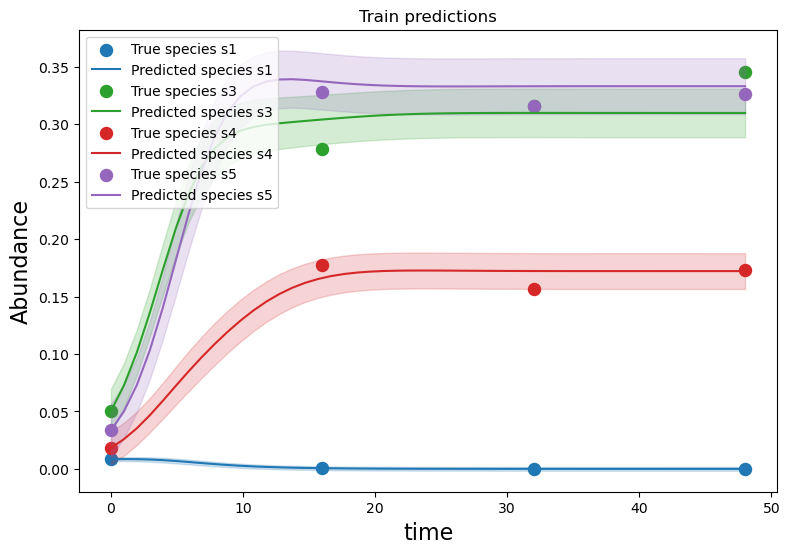

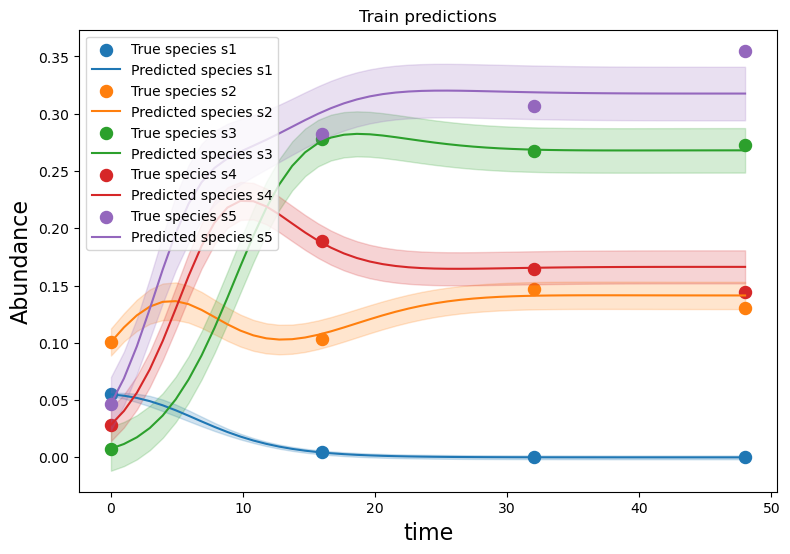

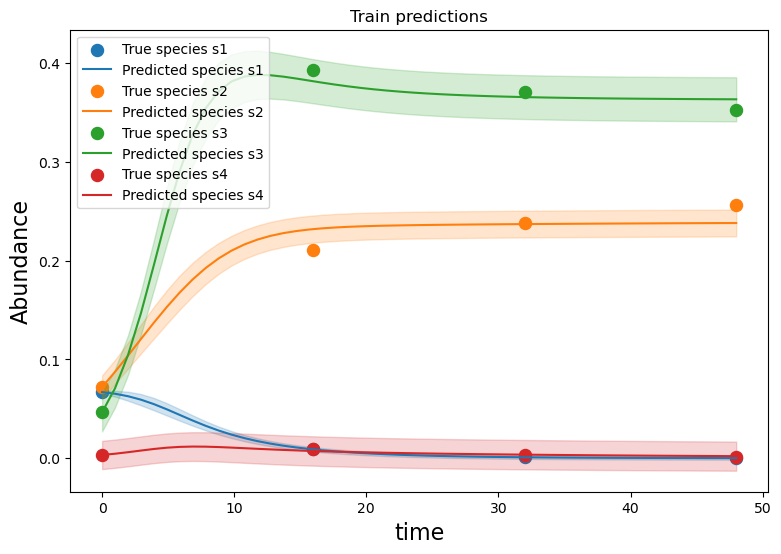

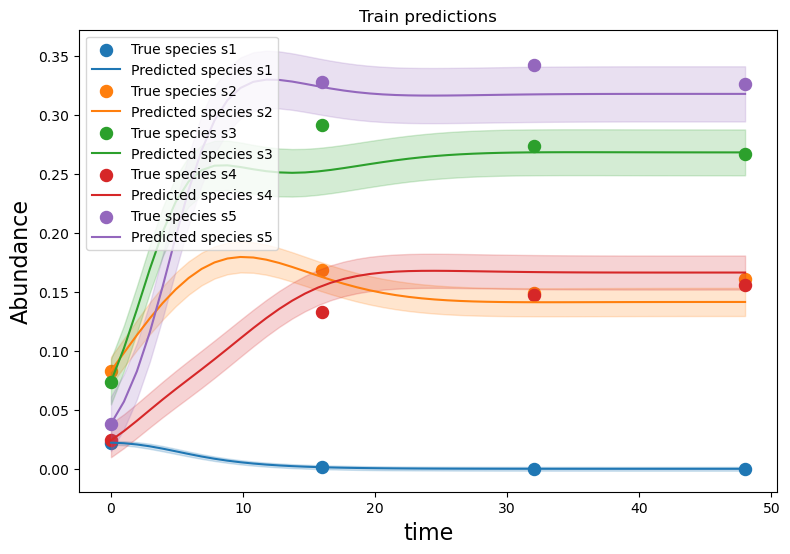

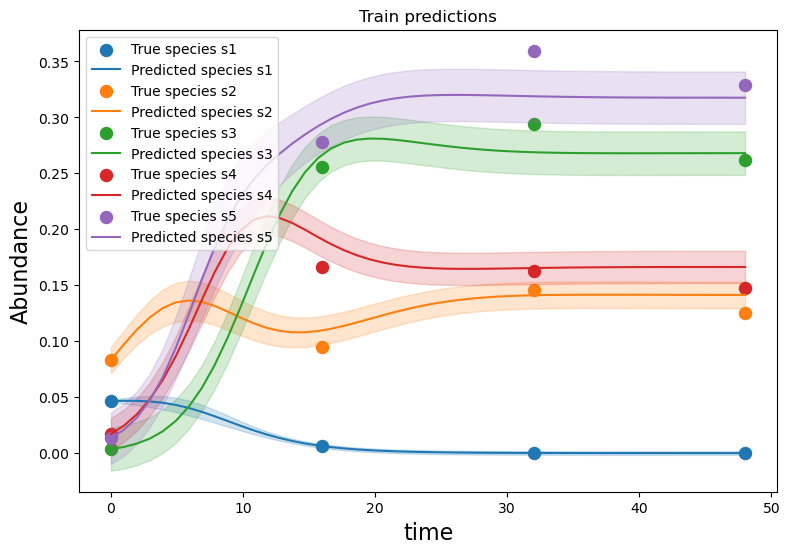

In [6]:
# pull just the community data
test_data = process_df(df, species) 

# plot the results
n_plot = 5
for n in range(n_plot):
    # pull sample
    exp, t_span, Y_m = test_data[n]
    
    # increase evaluation time
    t_eval = np.linspace(t_span[0], t_span[-1])
    
    # predict 
    pred, stdv = model.predict(Y_m, t_eval)
    
    plt.figure(figsize=(9, 6))
    for i, s in enumerate(species):
        if Y_m[0,i] > 0:
            plt.scatter(t_span, Y_m[:,i], label="True species " + s, color='C{}'.format(i), marker='o', s=75)
            plt.plot(t_eval, pred[:,i], label="Predicted species " + s, color='C{}'.format(i))
            plt.fill_between(t_eval, pred[:,i]-stdv[:,i], pred[:,i]+stdv[:,i], color='C{}'.format(i), alpha=0.2)

    plt.legend()
    plt.xlabel("time", fontsize=16)
    plt.ylabel("Abundance", fontsize=16)
    plt.title("Train predictions")
    plt.show()

# Show test predictions

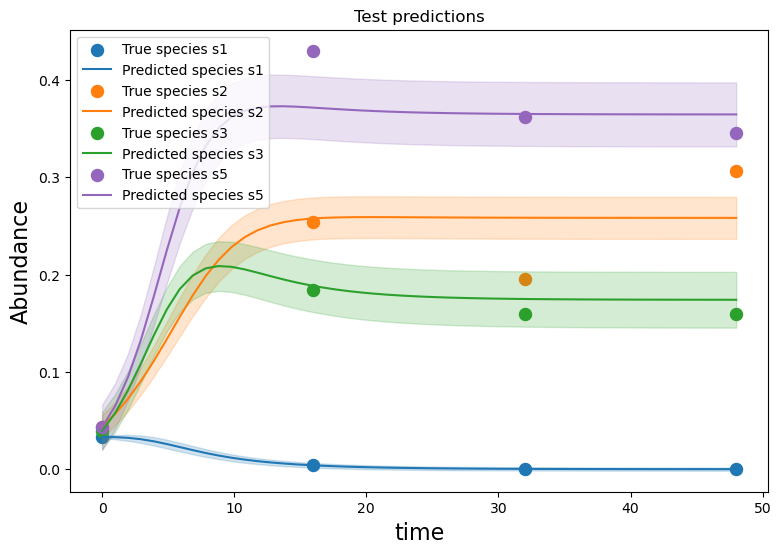

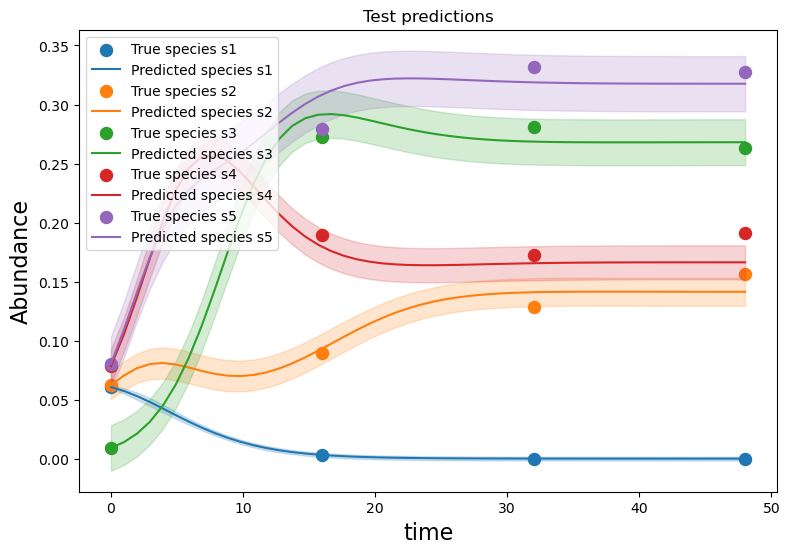

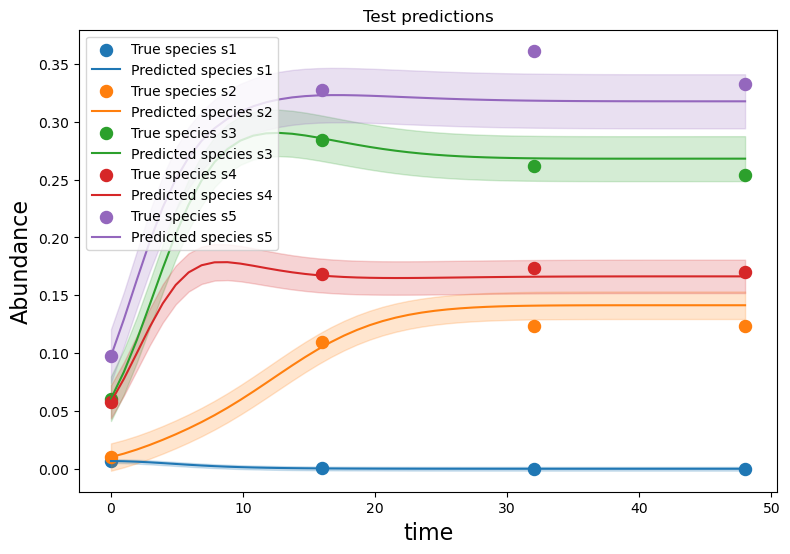

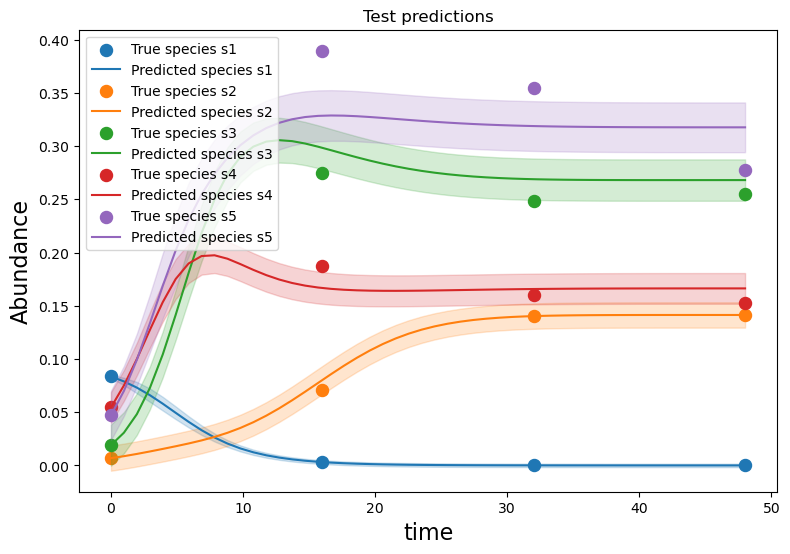

In [7]:
# pull just the community data
test_data = process_df(test_df, species) 

# plot the results
n_plot = len(np.unique(test_df.Treatments.values))
for n in range(n_plot):
    # pull sample
    exp, t_span, Y_m = test_data[n]
    
    # increase evaluation time
    t_eval = np.linspace(t_span[0], t_span[-1])
    
    # predict 
    pred, stdv = model.predict(Y_m, t_eval)
    
    plt.figure(figsize=(9, 6))
    for i, s in enumerate(species):
        if Y_m[0,i] > 0:
            plt.scatter(t_span, Y_m[:,i], label="True species " + s, color='C{}'.format(i), marker='o', s=75)
            plt.plot(t_eval, pred[:,i], label="Predicted species " + s, color='C{}'.format(i))
            plt.fill_between(t_eval, pred[:,i]-stdv[:,i], pred[:,i]+stdv[:,i], color='C{}'.format(i), alpha=0.2)

    plt.legend()
    plt.xlabel("time", fontsize=16)
    plt.ylabel("Abundance", fontsize=16)
    plt.title("Test predictions")
    plt.show()

# Save parameters and visualize posterior 

In [8]:
# get growth rates (r) and interaction matrix (A) and their std. deviations 
r, A, r_stdv, A_stdv = model.get_params()

In [9]:
# save parameters to dataframe 

# define list of parameter names, values, and std deviations
param_names = []
param_list = []
param_stdv_list = []
for i,si in enumerate(species):
    param_names.append(f"r_{si}")
    param_list.append(r[i])
    param_stdv_list.append(r_stdv[i])
    
for i,si in enumerate(species):
    for j,sj in enumerate(species):
        param_names.append(f"A_{si,sj}")
        param_list.append(A[i,j])
        param_stdv_list.append(A_stdv[i,j])

In [10]:
# store parameters in a Pandas dataframe
param_df = pd.DataFrame()
param_df['Param Name'] = param_names
param_df['Param mean'] = param_list
param_df['Param stdv'] = param_stdv_list

In [11]:
param_df

,Param Name,Param mean,Param stdv
0,r_s1,0.077109,0.058091
1,r_s2,0.334721,0.040770
2,r_s3,0.442713,0.029117
3,r_s4,0.429030,0.044224
4,r_s5,0.453325,0.049912
5,"A_('s1', 's1')",-0.969413,0.448037
6,"A_('s1', 's2')",-0.087803,0.174748
7,"A_('s1', 's3')",-0.513583,0.120402
8,"A_('s1', 's4')",-0.380006,0.196083
9,"A_('s1', 's5')",-0.329522,0.083714


In [12]:
# save to .csv
# param_df.to_csv("gLV_parameters.csv", index=False)

### Visualize posterior of interaction matrix

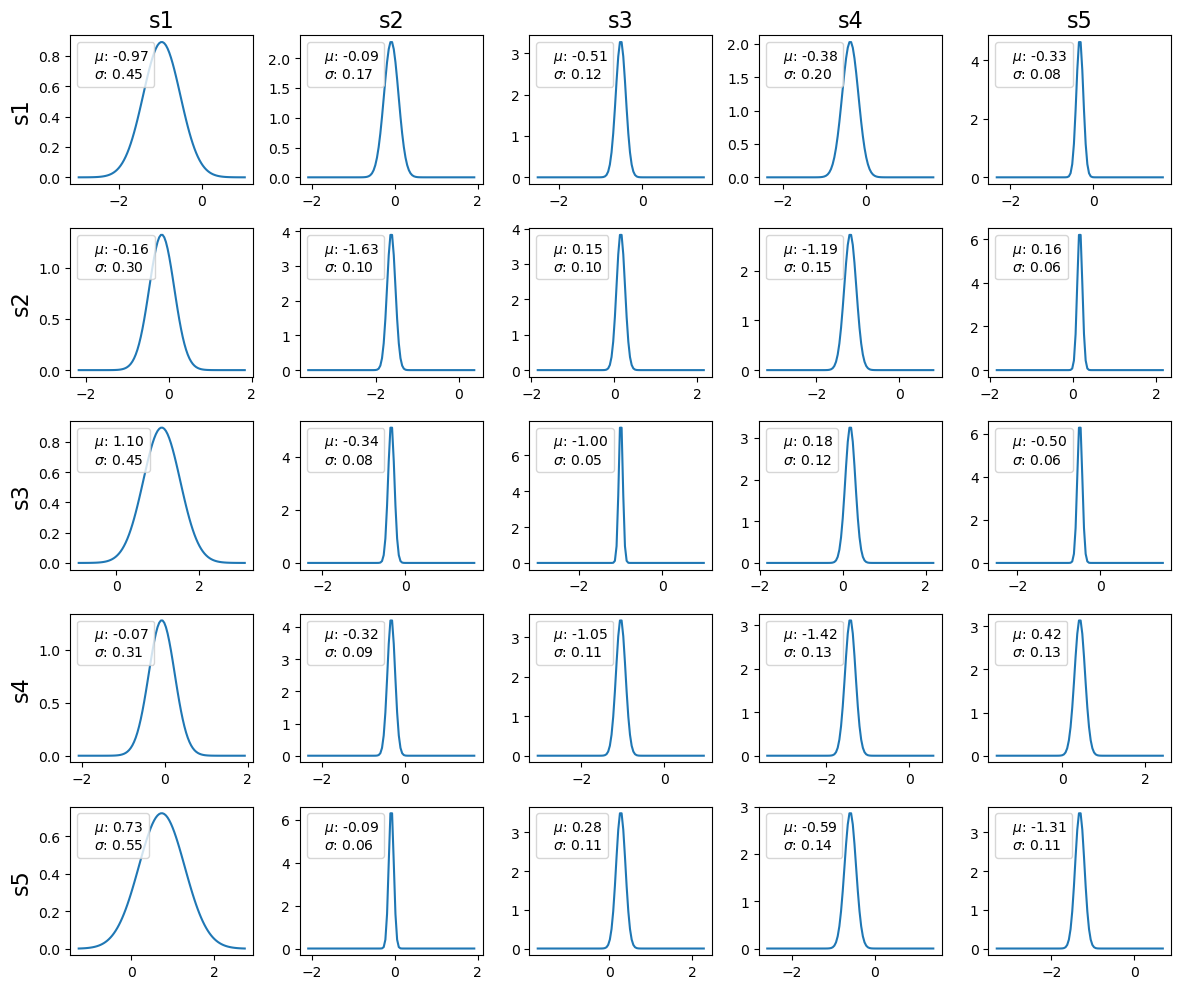

In [13]:
# shape of A matrix (m = n)
m, n = A.shape

# Create subplots
fig, axes = plt.subplots(m, n, figsize=(12, 10))

# Flatten the axes array to iterate through subplots
axes = axes.flatten()

# Iterate through each subplot
for i, ax in enumerate(axes):
    # Calculate the mean and standard deviation for the Gaussian PDF
    mean = A[i // n, i % n]
    stdv = A_stdv[i // n, i % n]

    # Generate x values for the PDF
    x = np.linspace(mean-2, mean+2, 100)

    # Calculate the PDF values using the normal distribution
    pdf = norm.pdf(x, loc=mean, scale=stdv)

    # Plot the Gaussian PDF
    ax.plot(x, pdf, label=f"$\mu$: {mean:.2f}\n$\sigma$: {stdv:.2f}")
    
    # set axis labels
    if i % n == 0: # on first column
        ax.set_ylabel(species[i//n], fontsize=16)

    if i // n == 0: # on first row
        ax.set_title(species[i%n], fontsize=16)

# Add legends to the subplots
for ax in axes:
    ax.legend(loc='upper left', handlelength=0)

# Adjust subplot layout
plt.tight_layout()

# Show the plot
# plt.savefig("posterior.png")
plt.show()